In [190]:
import numpy as np
from scipy.integrate import odeint
from scipy.optimize import fmin
import matplotlib.pyplot as plt

In [300]:
R = 0.05 #m
Deff = 1.6e-7
Cas = 0.0121
CAb = 3 # M
r = np.linspace(0,R,25)
ko = 0.0079
kc = Deff/1e-4
rho = 6 #kg/L

PHI = (ko*R**2*Cas/(Deff))

In [301]:
def bvp(S, r):
    # Ca = (k*CA - S[1])/k 
    dCdr = S[1]
    dJdr = (PHI/R**3)*S[0]**2
    dSdr = [dCdr, dJdr]
    return dSdr


#Shooting method for case of dCdr = 0 at r = 0

def shooting2(C_guess):
    S0 = [C_guess, 0]
    S2 = odeint(bvp, S0, r)
    C_numerical2 = S2[:,0]
    k = np.size(r)-1
    sol2 = abs(C_numerical2[k] - R)
    return sol2

#Running the optimization
C_ini_correct = fmin(shooting2, 0, xtol=1e-8)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 28
         Function evaluations: 56


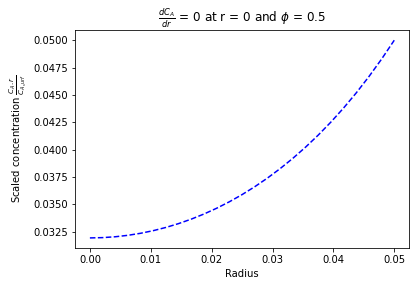

In [302]:
#Resolving the ODE with the correct initial value of G
S_ini2 = [C_ini_correct,0,]
S_correct2 = odeint(bvp, S_ini2, r)
C_correct2 = S_correct2[:,0]

#Plotting the result
plt.plot(r, C_correct2, "b--", label = 'Numerical solution')
plt.xlabel("Radius")
plt.ylabel("Scaled concentration " r'$\frac{C_A.r}{C_{A_surf}}$')
plt.title(r'$\frac{dC_A}{dr}$' " = 0 at r = 0 and " r'$\phi$' " = 0.5" )
plt.show()

In [264]:
C_correct2

array([0.03191951, 0.03194594, 0.03202531, 0.03215788, 0.0323441 ,
       0.03258459, 0.03288016, 0.03323181, 0.03364075, 0.0341084 ,
       0.03463641, 0.03522665, 0.03588127, 0.03660268, 0.03739361,
       0.03825708, 0.03919648, 0.0402156 , 0.04131863, 0.04251024,
       0.04379562, 0.04518052, 0.04667135, 0.0482752 , 0.04999999])

In [295]:
CAs = np.linspace(0.0001, 0.05, 30)

eta = (3*C_correct2[24]*Deff)/(ko * CAs**2 * 0.05)

In [305]:
CAs

array([0.0001    , 0.00182069, 0.00354138, 0.00526207, 0.00698276,
       0.00870345, 0.01042414, 0.01214483, 0.01386552, 0.01558621,
       0.0173069 , 0.01902759, 0.02074828, 0.02246897, 0.02418966,
       0.02591034, 0.02763103, 0.02935172, 0.03107241, 0.0327931 ,
       0.03451379, 0.03623448, 0.03795517, 0.03967586, 0.04139655,
       0.04311724, 0.04483793, 0.04655862, 0.04827931, 0.05      ])

In [304]:
eta

array([6.07595159e+02, 1.83291555e+00, 4.84472816e-01, 2.19432643e-01,
       1.24612109e-01, 8.02105694e-02, 5.59157309e-02, 4.11937755e-02,
       3.16040074e-02, 2.50111368e-02, 2.02850419e-02, 1.67821233e-02,
       1.41140053e-02, 1.20350569e-02, 1.03837674e-02, 9.05040302e-03,
       7.95829466e-03, 7.05256456e-03, 6.29309548e-03, 5.65001065e-03,
       5.10068991e-03, 4.62775301e-03, 4.21766778e-03, 3.85977120e-03,
       3.54556925e-03, 3.26822818e-03, 3.02219982e-03, 2.80294188e-03,
       2.60670683e-03, 2.43038064e-03])

In [303]:
thiele = (ko*R**2*CAs)/Deff
thiele

array([0.01234375, 0.22474138, 0.43713901, 0.64953664, 0.86193427,
       1.0743319 , 1.28672953, 1.49912716, 1.71152478, 1.92392241,
       2.13632004, 2.34871767, 2.5611153 , 2.77351293, 2.98591056,
       3.19830819, 3.41070582, 3.62310345, 3.83550108, 4.04789871,
       4.26029634, 4.47269397, 4.68509159, 4.89748922, 5.10988685,
       5.32228448, 5.53468211, 5.74707974, 5.95947737, 6.171875  ])

In [293]:
CAsurface = 0.015586
eta = 0.4119 
thiele = 1.499

In [294]:
Omega = (eta * kc)/(kc + eta*ko * (1 - thiele**0.5)* (R/3) * CAsurface)
Omega

0.41190488179240864